In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("blastchar/telco-customer-churn")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'telco-customer-churn' dataset.
Path to dataset files: /kaggle/input/telco-customer-churn


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# 1. Localizar o arquivo CSV dentro do caminho baixado
arquivos = os.listdir(path)
print(f"Arquivos encontrados na pasta: {arquivos}")

# 2. Criar o caminho completo para o arquivo (geralmente se chama 'WA_Fn-UseC_-Telco-Customer-Churn.csv')
arquivo_csv = os.path.join(path, arquivos[0])

# 3. Carregar o dataset
df = pd.read_csv(arquivo_csv)

# 4. Diagnóstico inicial
print("\n--- Estrutura do Dataset ---")
print(f"Linhas: {df.shape[0]} | Colunas: {df.shape[1]}")

print("\n--- Tipos de Dados ---")
display(df.info())

print("\n--- Primeiras Linhas ---")
display(df.head())

Arquivos encontrados na pasta: ['WA_Fn-UseC_-Telco-Customer-Churn.csv']

--- Estrutura do Dataset ---
Linhas: 7043 | Colunas: 21

--- Tipos de Dados ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-nul

None


--- Primeiras Linhas ---


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# 1. Forçar a conversão para numérico (espaços vazios viram NaN)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# 2. Verificar quantos valores nulos surgiram com essa conversão
print(f"Valores nulos em TotalCharges: {df['TotalCharges'].isnull().sum()}")

# 3. Como são poucos casos (geralmente 11 em 7043), vamos remover essas linhas
df.dropna(subset=['TotalCharges'], inplace=True)

print("Conversão concluída com sucesso!")

Valores nulos em TotalCharges: 11
Conversão concluída com sucesso!


In [ ]:
# Remover a coluna customerID
df.drop(columns=['customerID'], inplace=True)

print(f"Colunas restantes: {df.columns.tolist()}")

Colunas restantes: ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']


In [ ]:
# Transformar Yes/No em 1/0
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

print("Distribuição do Churn (agora numérico):")
print(df['Churn'].value_counts())

Distribuição do Churn (agora numérico):
Churn
0    5163
1    1869
Name: count, dtype: int64


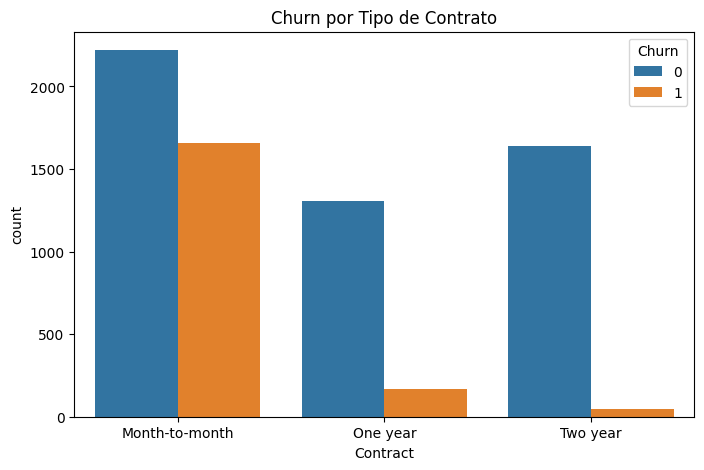

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Contract', hue='Churn')
plt.title('Churn por Tipo de Contrato')
plt.show()

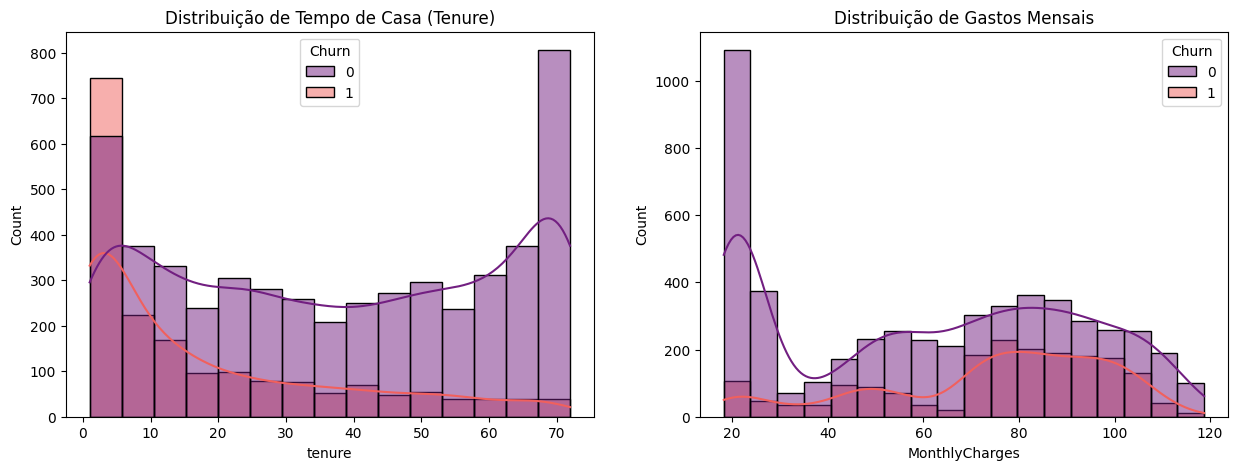

In [ ]:
# Criando uma figura com dois gráficos lado a lado
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Gráfico 1: Distribuição do Tenure (Tempo de casa em meses)
sns.histplot(data=df, x='tenure', hue='Churn', kde=True, ax=axes[0], palette='magma')
axes[0].set_title('Distribuição de Tempo de Casa (Tenure)')

# Gráfico 2: Distribuição do MonthlyCharges (Gasto Mensal)
sns.histplot(data=df, x='MonthlyCharges', hue='Churn', kde=True, ax=axes[1], palette='magma')
axes[1].set_title('Distribuição de Gastos Mensais')

plt.show()

In [ ]:
# Transformando variáveis categóricas em colunas numéricas (One-Hot Encoding)
# O drop_first=True serve para evitar redundância (se não é Homem, é Mulher, não precisa de duas colunas)
df_final = pd.get_dummies(df, drop_first=True)

# Verificando como ficou o novo dataset
print("Novo formato do dataset:")
print(df_final.shape)
display(df_final.head())

Novo formato do dataset:
(7032, 31)


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,False,True,False,False,True,...,False,False,False,False,False,False,True,False,True,False
1,0,34,56.95,1889.50,0,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,True
2,0,2,53.85,108.15,1,True,False,False,True,False,...,False,False,False,False,False,False,True,False,False,True
3,0,45,42.30,1840.75,0,True,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
4,0,2,70.70,151.65,1,False,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# 1. Transformar variáveis categóricas em números (One-Hot Encoding)
df_model = pd.get_dummies(df, drop_first=True)

# 2. Separar X (características) e y (o que queremos prever - Churn)
X = df_model.drop('Churn', axis=1)
y = df_model['Churn']

# 3. Dividir em Treino (80%) e Teste (20%)
# O random_state garante que, se você rodar de novo, o resultado seja o mesmo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Treinaremos com {X_train.shape[0]} amostras e testaremos com {X_test.shape[0]}")

Treinaremos com 5625 amostras e testaremos com 1407


In [ ]:
# 1. Instanciar o modelo
modelo_rf = RandomForestClassifier(n_estimators=100, random_state=42)

# 2. Treinar o modelo (O computador vai procurar os padrões agora)
modelo_rf.fit(X_train, y_train)

# 3. Fazer previsões com os dados de teste que o modelo nunca viu
previsoes = modelo_rf.predict(X_test)

# 4. Ver os resultados
print("\n--- Relatório de Classificação ---")
print(classification_report(y_test, previsoes))


--- Relatório de Classificação ---
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1033
           1       0.63      0.48      0.54       374

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.70      1407
weighted avg       0.77      0.79      0.78      1407



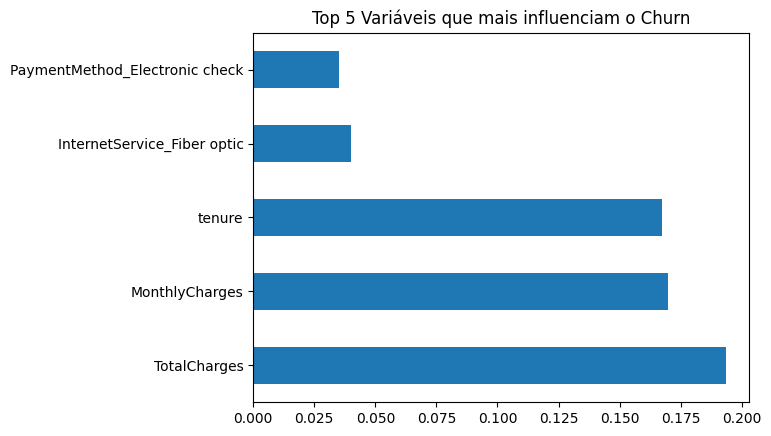

In [ ]:
# Ver as variáveis que o modelo considerou mais importantes
importâncias = pd.Series(modelo_rf.feature_importances_, index=X.columns)
importâncias.nlargest(5).plot(kind='barh')
plt.title('Top 5 Variáveis que mais influenciam o Churn')
plt.show()

In [ ]:
from xgboost import XGBClassifier

# 1. Instanciar o XGBoost
# O parâmetro scale_pos_weight ajuda a dar mais peso para os clientes que saem (compensando o desbalanceamento)
modelo_xgb = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    scale_pos_weight=3, # Dá 3x mais importância para a classe Churn
    random_state=42
)

# 2. Treinar
modelo_xgb.fit(X_train, y_train)

# 3. Prever
previsoes_xgb = modelo_xgb.predict(X_test)

# 4. Resultados
print("\n--- Relatório de Classificação (XGBoost Otimizado) ---")
print(classification_report(y_test, previsoes_xgb))


--- Relatório de Classificação (XGBoost Otimizado) ---
              precision    recall  f1-score   support

           0       0.89      0.73      0.80      1033
           1       0.51      0.75      0.60       374

    accuracy                           0.74      1407
   macro avg       0.70      0.74      0.70      1407
weighted avg       0.79      0.74      0.75      1407




--- Relatório de Classificação (Foco em identificar Churn) ---
              precision    recall  f1-score   support

           0       0.90      0.70      0.79      1033
           1       0.49      0.79      0.61       374

    accuracy                           0.73      1407
   macro avg       0.70      0.75      0.70      1407
weighted avg       0.79      0.73      0.74      1407



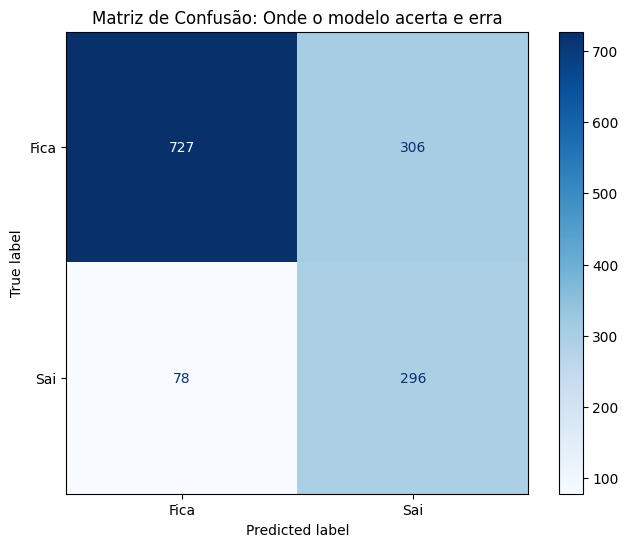

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# 1. Calculando o peso para equilibrar as classes
# Proporção de (Não-Churn / Churn) para dizer ao modelo quanto peso dar à classe 1
ratio = float(y_train.value_counts()[0]) / y_train.value_counts()[1]

# 2. Treinando o XGBoost com foco em RECALL
modelo_final = XGBClassifier(
    n_estimators=100,
    max_depth=4,
    learning_rate=0.1,
    scale_pos_weight=ratio, # O segredo para o Recall alto
    random_state=42
)

modelo_final.fit(X_train, y_train)
previsoes_final = modelo_final.predict(X_test)

# 3. Exibindo os resultados
print("\n--- Relatório de Classificação (Foco em identificar Churn) ---")
print(classification_report(y_test, previsoes_final))

# 4. Matriz de Confusão Visual
fig, ax = plt.subplots(figsize=(8, 6))
ConfusionMatrixDisplay.from_estimator(modelo_final, X_test, y_test, display_labels=['Fica', 'Sai'], cmap='Blues', ax=ax)
plt.title('Matriz de Confusão: Onde o modelo acerta e erra')
plt.show()

In [ ]:
# Em vez de prever 0 ou 1 direto, pegamos a probabilidade
y_prob = modelo_final.predict_proba(X_test)[:, 1]

# Definimos que qualquer pessoa com mais de 35% de chance de sair será marcada como Churn
novo_threshold = 0.35
previsoes_agressivas = (y_prob >= novo_threshold).astype(int)

print(f"\n--- Relatório com Threshold de {novo_threshold} ---")
print(classification_report(y_test, previsoes_agressivas))


--- Relatório com Threshold de 0.35 ---
              precision    recall  f1-score   support

           0       0.93      0.61      0.74      1033
           1       0.45      0.87      0.59       374

    accuracy                           0.68      1407
   macro avg       0.69      0.74      0.67      1407
weighted avg       0.80      0.68      0.70      1407



In [ ]:
!pip install shap

In [ ]:
import shap

# 1. Criar o explicador (Explainer) para o seu modelo XGBoost
explainer = shap.TreeExplainer(modelo_final)

# 2. Calcular os valores SHAP para os dados de teste
# Isso pode demorar alguns segundos
shap_values = explainer(X_test)

print("Cálculo do SHAP concluído!")

Cálculo do SHAP concluído!


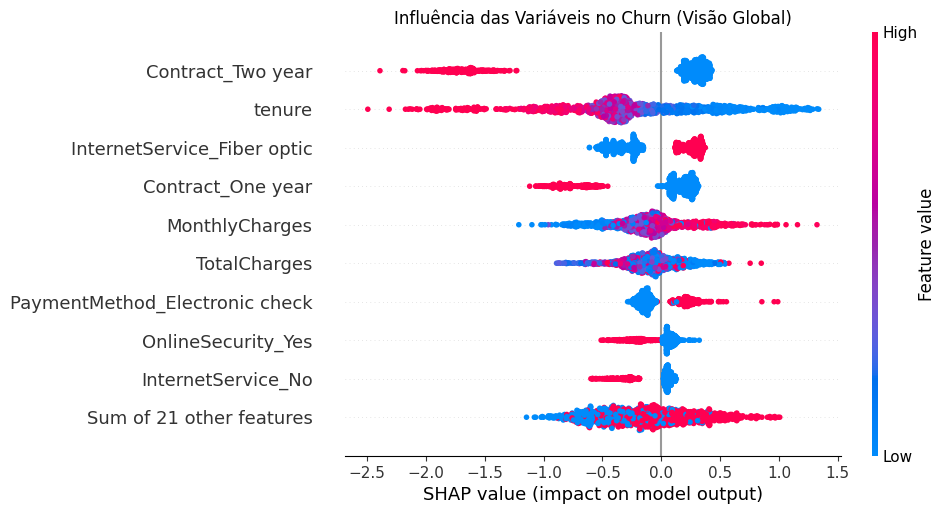

In [ ]:
# Gráfico de resumo (Summary Plot)
plt.title('Influência das Variáveis no Churn (Visão Global)')
shap.plots.beeswarm(shap_values)

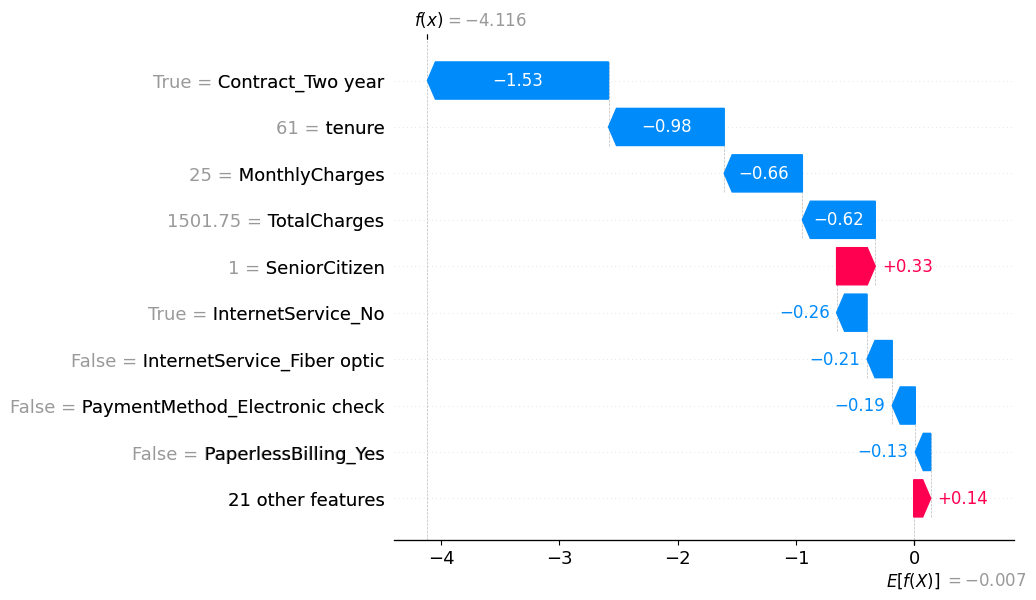

In [ ]:
# Escolha um cliente específico (ex: índice 0)
# O waterfall plot mostra o "caminho" da decisão
shap.plots.waterfall(shap_values[0])